In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

def load_data(path = r"E:\Documents\Data\Datasets"):
    # point to the data set directory and choose the file to load
    import os
    p = path
    os.chdir(p) 

    #choose a data set
    while True:
        files = []
        with os.scandir(p) as dir:
            for count,entry in enumerate(dir):
                print(f"{count}) {entry.name}")
                files.append(entry.name)




        data = int(input('Enter the file index: '))
        data = os.path.join(p,files[data])
        if not data.endswith('.csv'):
            p = data
            print("\nThis is a directory\n")
        else:
            print(f'\nUsing the {os.path.basename(data)} dataset')
            break
            
    return data

In [2]:
dataset = load_data()

0) deepnlp
1) fake-and-real-news-dataset
2) game-of-thrones-srt
3) graduate-admissions
4) news-headlines-dataset-for-sarcasm-detection
5) ted-talks
6) young-people-survey
7) developer_survey_2019
8) Video 2020-04-17_2020-05-15 iCburks
9) Video 2013-04-06_2020-05-15 Gabe Flomo
10) Yelp Data
11) Udemy
12) NLP Data
13) data-police-shootings-master
14) emnist digits
15) CSV
16) Heart attack
17) Student placement
18) Background checks
19) Myers Briggs Type Indicator
20) Twitter US Airline sentiment
21) reddit sarcasm
22) developer survey 2017
23) twitter threads
24) Alchohol consumption
25) Fake Insta account
26) youtube data
27) IKEA Furniture
28) question classifcation
29) question answering
30) star data
31) Credit risk
32) tweets analysis
33) New york times comments
34) bank marketing campaings
35) Python questions from S.O
Enter the file index: 15

This is a directory

0) winequality-red.csv
1) AB_NYC_2019.csv
2) ArXiv_old.csv
3) books.csv
4) cannabis.csv
5) diamonds.csv
6) ETH_1h.csv.

In [3]:
df = pd.read_csv(dataset)

In [4]:
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# see the categorical class types and the value counts for each
categories = [col for col in df.columns if df[col].dtype == 'O']
print('Distribution of categorical variables\n')
for category in categories:
    print(df[category].value_counts(normalize = True)*100)
    print()

Distribution of categorical variables

female    51.8
male      48.2
Name: gender, dtype: float64

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

none         64.2
completed    35.8
Name: test preparation course, dtype: float64



In [33]:
# add a new column for the overall score
df['overall'] = np.round(df[['math score','reading score','writing score']].sum(axis = 1)/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


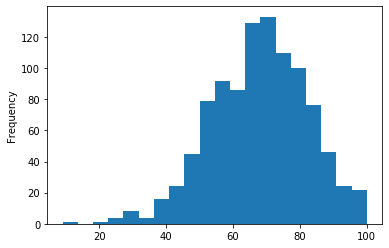

In [36]:
df['overall'].plot.hist(bins = 20)

In [37]:
# drop the columns that have the possibility to influence the model too strongly
df2 = df.drop(['math score','reading score','writing score'], axis = 1)
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall
0,female,group B,bachelor's degree,standard,none,72.67
1,female,group C,some college,standard,completed,82.33
2,female,group B,master's degree,standard,none,92.67
3,male,group A,associate's degree,free/reduced,none,49.33
4,male,group C,some college,standard,none,76.33
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.00
996,male,group C,high school,free/reduced,none,57.33
997,female,group C,high school,free/reduced,completed,65.00
998,female,group D,some college,standard,completed,74.33


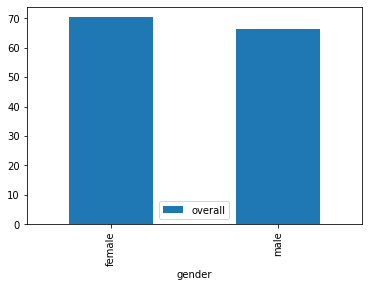

In [50]:
# which gender does better
df2.groupby('gender').median().plot(kind = 'bar')

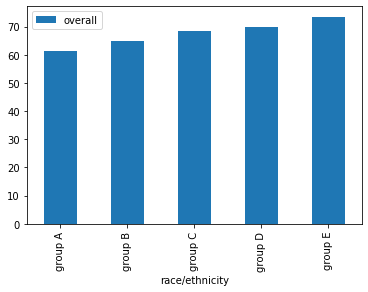

In [51]:
# which group does better
df2.groupby(['race/ethnicity']).median().plot(kind = 'bar')

In [55]:
# which gender by race group does better
df2.groupby(['gender','race/ethnicity']).median()

overall
gender race/ethnicity         
female group A          63.665
       group B          67.670
       group C          70.000
       group D          71.670
       group E          73.330
male   group A          61.000
       group B          62.835
       group C          64.670
       group D          68.670
       group E          73.670

In [87]:
# Do a feature selection to see which features are most important for predicting overall score
from sklearn.model_selection import train_test_split

x_train = df2.drop('overall', axis = 1)
y_train = df2['overall']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = .2, random_state = 2)

In [88]:
# lets encode our categorical variables with a label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


encoder = LabelEncoder()
scaler = StandardScaler()
x_train_encoded = encoder.fit_transform(x_train)
xtrain = scaler.fit_transform(x_train_encoded)

ValueError: bad input shape (800, 5)

In [84]:
x_train.T


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender_female,1,1,1,0,0,1,1,0,0,1,...,0,1,1,1,0,1,0,1,1,1
gender_male,0,0,0,1,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
race/ethnicity_group B,1,0,1,0,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
race/ethnicity_group C,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
race/ethnicity_group A,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
race/ethnicity_group D,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1
race/ethnicity_group E,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
parental level of education_bachelor's degree,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
parental level of education_some college,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
parental level of education_master's degree,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [82]:
# using lasso regression to find the most important features
sel = SelectFromModel(Lasso(alpha = .005, random_state = 2))
sel.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=2,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [83]:
sel.get_support()

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False])

In [85]:
selected = x_train.columns[sel.get_support()]

In [86]:
selected

Index(['gender_female', 'race/ethnicity_group B', 'race/ethnicity_group A',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_master's degree',
       'parental level of education_associate's degree',
       'parental level of education_high school',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')